In [ ]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
# Pretty display for notebooks
%matplotlib inline

In [ ]:
# Loading dataset into dataframes
X_train_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\training images.csv",  header=None)
y_train_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\training labels.csv",  header=None)
X_test_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\testing images.csv",  header=None)
y_test_letters = pd.read_csv("C:\\Users\\Omar\\Downloads\\archive\\testing labels.csv",  header=None)

# print statistics about the dataset
print("There are %d train Arabic letter images" %X_train_letters.shape[0])
print("There are %d test Arabic letter images" %X_test_letters.shape[0])
X_train_letters.head()


There are 13440 train Arabic letter images
There are 3360 test Arabic letter images


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_letters.shape

(13440, 4096)

In [ ]:
# Loading dataset into dataframes
X_train_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\training images.csv', header=None)
y_train_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\training labels.csv', header=None)
X_test_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\testing images.csv', header=None)
y_test_digits = pd.read_csv('C:\\Users\\Omar\\Downloads\\archive (1)\\testing labels.csv', header=None)

# print statistics about the dataset
print("There are %d training arabic digit images  " %X_train_digits.shape[0])
print("There are %d testing arabic digit images " %X_test_digits.shape[0])


There are 60000 training arabic digit images  
There are 10000 testing arabic digit images 


In [ ]:
X_train_digits.shape

(60000, 4096)

In [ ]:
def convert_values_to_image(image_values):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  new_image.show()
  return new_image

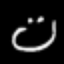

In [ ]:
convert_values_to_image(X_train_letters.loc[19])

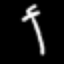

In [ ]:
convert_values_to_image(X_train_letters.loc[0])

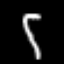

In [ ]:
convert_values_to_image(X_train_digits.loc[2])

In [ ]:
# For digits data
X_train_digits_scaled = X_train_digits.values.astype('float32') / 255
y_train_digits = y_train_digits.astype('int32')

X_test_digits_scaled = X_test_digits.values.astype('float32') / 255
y_test_digits= y_test_digits.astype('int32')

# For letters data
X_train_letters_scaled = X_train_letters.values.astype('float32') / 255
y_train_letters = y_train_letters.astype('int32')

X_test_letters_scaled = X_test_letters.values.astype('float32') / 255
y_test_letters = y_test_letters.astype('int32')


In [ ]:
#ensure that the pixels of letters are scaled from 0 to 1
print("Train images of letters after scaling")
print(X_train_letters_scaled[:7])


Train images of letters after scaling
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#ensure that the pixels of digits are scaled from 0 to 1
print("Train images of digits after scaling")
print(X_train_digits_scaled[:7])

Train images of digits after scaling
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.utils import to_categorical

# One-hot encoding for letters dataset
number_of_classes = 38
# Assuming y_train_letters and y_test_letters are class indices for letters
y_train_letters_encoded  = to_categorical(y_train_letters, num_classes=number_of_classes)
y_test_letters_encoded = to_categorical(y_test_letters, num_classes=number_of_classes)

# Assuming y_train_digits and y_test_digits are class indices for digits
y_train_digits_encoded  = to_categorical(y_train_digits, num_classes=number_of_classes)
y_test_digits_encoded  = to_categorical(y_test_digits, num_classes=number_of_classes)

In [ ]:
# Reshape digit images
X_train_digits_scaled = X_train_digits_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_test_digits_scaled = X_test_digits_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_train_letters_scaled = X_train_letters_scaled.reshape([-1, 64, 64, 1])

# Reshape letter images
X_test_letters_scaled = X_test_letters_scaled.reshape([-1, 64, 64, 1])

# Print the shapes
print(X_train_digits_scaled.shape, y_train_digits_encoded.shape, X_test_digits_scaled.shape, y_test_digits_encoded.shape)
print(X_train_letters_scaled.shape, y_train_letters_encoded.shape, X_test_letters_scaled.shape, y_test_letters_encoded.shape)

(60000, 64, 64, 1) (60000, 38) (10000, 64, 64, 1) (10000, 38)
(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


In [ ]:
# Concatenate training data
X_train = np.concatenate((X_train_digits_scaled, X_train_letters_scaled), axis=0)
y_train = np.concatenate((y_train_digits_encoded, y_train_letters_encoded), axis=0)
print("Total Training images are {} images of shape".format(X_train.shape[0]))
print(X_train.shape, y_train.shape)

# Concatenate testing data
X_test = np.concatenate((X_test_digits_scaled, X_test_letters_scaled), axis=0)
y_test = np.concatenate((y_test_digits_encoded, y_test_letters_encoded), axis=0)
print("Total Testing images are {} images of shape".format(X_test.shape[0]))
print(X_test.shape, y_test.shape)


Total Training images are 73440 images of shape
(73440, 64, 64, 1) (73440, 38)
Total Testing images are 13360 images of shape
(13360, 64, 64, 1) (13360, 38)


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
model = models.Sequential()

# Flatten the input
model.add(layers.Flatten(input_shape=(64, 64, 1)))

# Connected layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))

# Output layer
model.add(layers.Dense(38, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=512, verbose=1, callbacks=[checkpointer])

Epoch 1/100
144/144 [==============================] - ETA: 0s - loss: 1.2384 - accuracy: 0.6731
Epoch 1: val_loss improved from inf to 1.03298, saving model to weights.hdf5
144/144 [==============================] - 4s 16ms/step - loss: 1.2384 - accuracy: 0.6731 - val_loss: 1.0330 - val_accuracy: 0.7329
Epoch 2/100
139/144 [===========================>..] - ETA: 0s - loss: 0.7455 - accuracy: 0.8001
Epoch 2: val_loss improved from 1.03298 to 0.77903, saving model to weights.hdf5
144/144 [==============================] - 2s 12ms/step - loss: 0.7444 - accuracy: 0.8001 - val_loss: 0.7790 - val_accuracy: 0.7752
Epoch 3/100
141/144 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.8240
Epoch 3: val_loss improved from 0.77903 to 0.63604, saving model to weights.hdf5
144/144 [==============================] - 2s 12ms/step - loss: 0.5996 - accuracy: 0.8239 - val_loss: 0.6360 - val_accuracy: 0.7996
Epoch 4/100
143/144 [============================>.] - ETA: 0s - loss: 0.5

In [ ]:
model.load_weights('weights.hdf5')

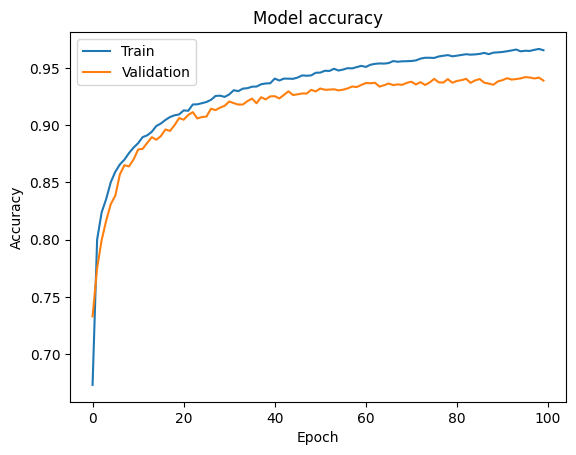

In [ ]:
# Plot training & validation accuracy of the frist training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

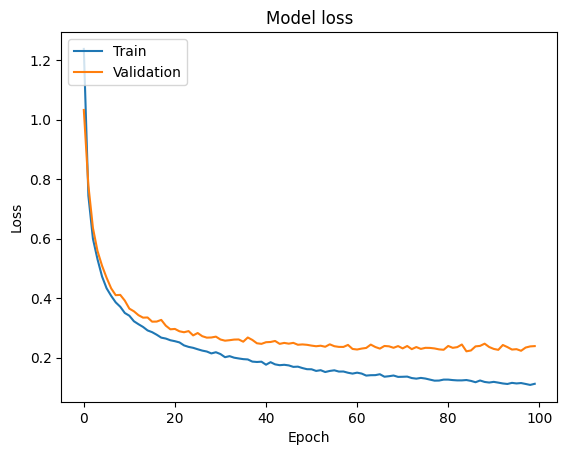

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
val_acc = model.evaluate(X_test, y_test)
print('Loss value is ',val_acc[0])
print('Accuracy value is ',val_acc[1])

418/418 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9391
Loss value is  0.22090385854244232
Accuracy value is  0.9390718340873718


In [ ]:
from tensorflow.keras.optimizers import Adam

custom_adam = Adam(learning_rate=0.00001, beta_1=0.95, beta_2=0.999, epsilon=1e-7)

model = models.Sequential()

# Flatten the input
model.add(layers.Flatten(input_shape=(64, 64, 1)))

# Connected layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))

# Output layer
model.add(layers.Dense(38, activation='softmax'))

model.compile(optimizer=custom_adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.load_weights('weights.hdf5')

In [ ]:
# we achive a good result but we could do more training
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=100, verbose=1, callbacks=[checkpointer])

Epoch 1/50
730/735 [============================>.] - ETA: 0s - loss: 0.1100 - accuracy: 0.9652
Epoch 1: val_loss improved from inf to 0.22276, saving model to weights.hdf5
735/735 [==============================] - 7s 8ms/step - loss: 0.1098 - accuracy: 0.9653 - val_loss: 0.2228 - val_accuracy: 0.9394
Epoch 2/50
735/735 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.9651
Epoch 2: val_loss did not improve from 0.22276
735/735 [==============================] - 6s 8ms/step - loss: 0.1083 - accuracy: 0.9651 - val_loss: 0.2234 - val_accuracy: 0.9395
Epoch 3/50
733/735 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 0.9666
Epoch 3: val_loss did not improve from 0.22276
735/735 [==============================] - 6s 8ms/step - loss: 0.1062 - accuracy: 0.9667 - val_loss: 0.2240 - val_accuracy: 0.9394
Epoch 4/50
735/735 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9667
Epoch 4: val_loss did not improve from 0.22276
735/7

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4195328   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]

In [ ]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

418/418 [==============================] - 1s 2ms/step


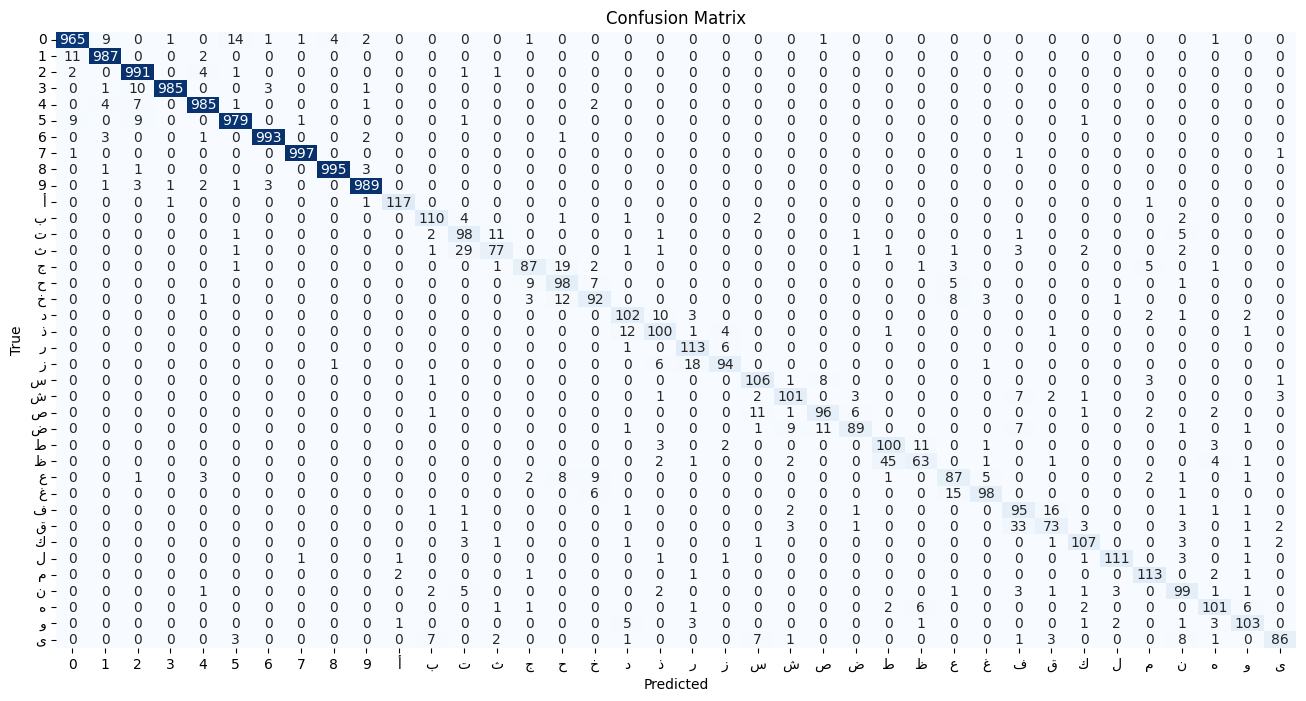

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined your conversion functions

# Your existing code
y_test_arg = np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test_arg, Y_pred)

# Plot the confusion matrix with category labels
plt.figure(figsize=(16, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[convert_categorical_label_to_real_label(label) for label in np.unique(y_test_arg)],
            yticklabels=[convert_categorical_label_to_real_label(label) for label in np.unique(y_test_arg)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, X_test[[sample_index]], y_test[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(y_test[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label

In [ ]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

1/1 [==============================] - 0s 28ms/step
The following image has the written character '1' but the model predicted it as '1'


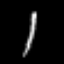

In [ ]:
sample_index = 21
show_example(sample_index)

convert_values_to_image(X_test_digits.loc[sample_index])

1/1 [==============================] - 0s 25ms/step
The following image has the written character 'ض' but the model predicted it as 'ض'


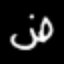

In [ ]:
sample_index = 10141
show_example(sample_index)
convert_values_to_image(X_test_letters.loc[sample_index - X_test_digits.shape[0]])

1/1 [==============================] - 0s 20ms/step
The following image has the written character 'س' but the model predicted it as 'س'


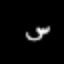

In [ ]:
sample_index = 11422
show_example(sample_index)
convert_values_to_image(X_test_letters.loc[sample_index - X_test_digits.shape[0]])

1/1 [==============================] - 0s 19ms/step
The following image has the written character 'ظ' but the model predicted it as 'ظ'


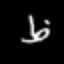

In [ ]:
sample_index = 11488
show_example(sample_index)
convert_values_to_image(X_test_letters.loc[sample_index - X_test_digits.shape[0]])